<a href="https://colab.research.google.com/github/NGONGOCHA/Machine-Learning/blob/main/Ch%C6%B0%C6%A1ng_1_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TF- term frequency – tần số xuất hiện của 1 từ trong 1 văn bản

Term Frequency là con số thể hiện thuật ngữ đó xuất hiện bao nhiêu lần trong tài liệu này. Nếu thuật ngữ đó xuất hiện càng nhiều thì trọng số càng cao.

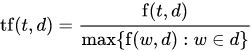

Trong đó:
- Thương của số lần xuất hiện 1 từ trong văn bản và số lần xuất hiện nhiều nhất của một từ bất kỳ trong văn bản đó. (giá trị sẽ thuộc khoảng [0, 1])
- f(t,d) – số lần xuất hiện từ t trong văn bản d.
- max{f(w,d):w∈d} – số lần xuất hiện nhiều nhất của một từ bất kỳ trong văn bản.


#IDF - Inverse Document Frequency(Nghịch đảo tần suất của văn bản)

IDF: giúp đánh giá tầm quan trọng của một từ. Khi tính toán TF , tất cả các từ được coi như có độ quan trọng bằng nhau. Nhưng  một số từ thường xuất hiện rất nhiều lần nhưng độ quan trọng là không cao. Như thế chúng ta cần giảm độ quan trọng của những từ này xuống.

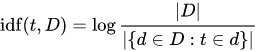

Trong đó:

- idf(t, D): giá trị idf của từ t trong tập văn bản

- |D|: Tổng số văn bản trong tập D

- |{d ∈ D : t ∈ d}|: thể hiện số văn bản trong tập D có chứa từ t.

Cơ số logarit trong công thức này không thay đổi giá trị idf của từ mà chỉ thu hẹp khoảng giá trị của từ đó. Vì thay đổi cơ số sẽ dẫn đến việc giá trị của các từ thay đổi bởi một số nhất định và tỷ lệ giữa các trọng lượng với nhau sẽ không thay đổi. (nói cách khác, thay đổi cơ số sẽ không ảnh hưởng đến tỷ lệ giữa các giá trị IDF). Việc sử dụng logarit nhằm giúp giá trị tf-idf của một từ nhỏ hơn, do chúng ta có công thức tính tf-idf của một từ trong 1 văn bản là tích của tf và idf của từ đó.

#Giá trị TF-IDF:

image.png

Những từ có giá trị TF-IDF cao là những từ càng có liên quan trong tài liệu cụ thể.

#Văn bản tiếng Anh 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [200]:
vbta1 = open('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/hocmay/corpus-tf-idf/tieng Anh/vb01.txt', encoding='cp1252')
vbta2 = open('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/hocmay/corpus-tf-idf/tieng Anh/vb02.txt', encoding='cp1252')
vbta3 = open('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/hocmay/corpus-tf-idf/tieng Anh/vb03.txt', encoding='cp1252')
vbta4 = open('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/hocmay/corpus-tf-idf/tieng Anh/vb04.txt', encoding='cp1252')
vbta5 = open('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/hocmay/corpus-tf-idf/tieng Anh/vb05.txt', encoding='cp1252')
docvbta1 = vbta1.read()
docvbta2 = vbta2.read()
docvbta3 = vbta3.read()
docvbta4 = vbta4.read()
docvbta5 = vbta5.read()

In [201]:
doc1 = docvbta1.split(" ")
doc2 = docvbta2.split(" ")
doc3 = docvbta3.split(" ")
doc4 = docvbta4.split(" ")
doc5 = docvbta5.split(" ")

In [202]:
wordSet = set(doc1).union(set(doc2)).union(set(doc3)).union(set(doc4)).union(set(doc5))

In [203]:
wordDict1 = dict.fromkeys(wordSet, 0) 
wordDict2 = dict.fromkeys(wordSet, 0) 
wordDict3 = dict.fromkeys(wordSet, 0) 
wordDict4 = dict.fromkeys(wordSet, 0) 
wordDict5 = dict.fromkeys(wordSet, 0) 

In [204]:
for word in doc1:
    wordDict1[word]+=1
    
for word in doc2:
    wordDict2[word]+=1

for word in doc3:
    wordDict3[word]+=1

for word in doc4:
    wordDict4[word]+=1

for word in doc5:
    wordDict5[word]+=1

In [205]:
import pandas as pd
pd.DataFrame([wordDict1, wordDict2, wordDict3, wordDict4, wordDict5])

,Minh,USD).\n\nThe,belonged,(Nha,"24/7,”",Improved,10.04,North,"rubbish,",I,...,transfer,Vingroup,Vietcombank,"systems,",rounds,keeping,caused,speak,"up,",cheer
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,4,...,1,0,0,0,0,0,0,1,1,1
2,1,0,1,1,0,2,0,0,0,2,...,0,0,0,0,0,0,2,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [206]:
def computeTF(wordDict, words):
    tfDict = {}
    wordslen = len(words)
    for word, count in wordDict.items():
        tfDict[word] = count/float(wordslen)
    return tfDict

In [207]:
tfdoc1 = computeTF(wordDict1, doc1)
tfdoc2 = computeTF(wordDict2, doc2)
tfdoc3 = computeTF(wordDict3, doc3)
tfdoc4 = computeTF(wordDict4, doc4)
tfdoc5 = computeTF(wordDict5, doc5)

In [208]:
tfdoc1

{'Minh': 0.002004008016032064,
 'USD).\n\nThe': 0.0,
 'belonged': 0.0,
 '(Nha': 0.0,
 '24/7,”': 0.0,
 'Improved': 0.0,
 '10.04': 0.0,
 'North': 0.0,
 'rubbish,': 0.0,
 'I': 0.0,
 '\n\nOn': 0.0,
 'awards,': 0.0,
 'academy': 0.0,
 'VND': 0.0,
 'more': 0.0,
 'so.\n\nFor': 0.0,
 'respectively': 0.004008016032064128,
 'organise': 0.0,
 '0.93%,': 0.0,
 'digitalisation,': 0.0,
 'dipped': 0.0,
 'basketball': 0.0,
 'week': 0.0,
 'accompanied': 0.002004008016032064,
 'rising': 0.0,
 'Vice': 0.0,
 'and': 0.03006012024048096,
 'down': 0.0,
 'only': 0.004008016032064128,
 'division,': 0.004008016032064128,
 'Southern': 0.0,
 'lost': 0.0,
 'fans': 0.0,
 'prize': 0.004008016032064128,
 'runner-up': 0.002004008016032064,
 'against': 0.0,
 'You': 0.0,
 'energy': 0.0,
 'network': 0.0,
 'IUH,': 0.0,
 'before': 0.0,
 'going': 0.0,
 'Shane': 0.0,
 'Awards': 0.0,
 'belonging': 0.0,
 'red': 0.0,
 'together': 0.0,
 'In': 0.002004008016032064,
 'Henry': 0.0,
 'named': 0.002004008016032064,
 'belong': 0.0,
 'ac

In [209]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict

In [210]:
idfs = computeIDF([wordDict1, wordDict2, wordDict3, wordDict4, wordDict5])

In [211]:
idfs

{'Minh': 0.22184874961635637,
 'USD).\n\nThe': 0.6989700043360189,
 'belonged': 0.6989700043360189,
 '(Nha': 0.6989700043360189,
 '24/7,”': 0.6989700043360189,
 'Improved': 0.6989700043360189,
 '10.04': 0.6989700043360189,
 'North': 0.6989700043360189,
 'rubbish,': 0.6989700043360189,
 'I': 0.3979400086720376,
 '\n\nOn': 0.6989700043360189,
 'awards,': 0.6989700043360189,
 'academy': 0.6989700043360189,
 'VND': 0.6989700043360189,
 'more': 0.22184874961635637,
 'so.\n\nFor': 0.6989700043360189,
 'respectively': 0.6989700043360189,
 'organise': 0.6989700043360189,
 '0.93%,': 0.6989700043360189,
 'digitalisation,': 0.6989700043360189,
 'dipped': 0.6989700043360189,
 'basketball': 0.6989700043360189,
 'week': 0.6989700043360189,
 'accompanied': 0.6989700043360189,
 'rising': 0.6989700043360189,
 'Vice': 0.6989700043360189,
 'and': 0.0,
 'down': 0.3979400086720376,
 'only': 0.0,
 'division,': 0.6989700043360189,
 'Southern': 0.6989700043360189,
 'lost': 0.6989700043360189,
 'fans': 0.39794

In [212]:
def computeTFIDF(tfDocs, idfs):
    tfidf = {}
    for word, val in tfDocs.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [213]:
tfidfDoc1 = computeTFIDF(tfdoc1, idfs)
tfidfDoc2 = computeTFIDF(tfdoc2, idfs)
tfidfDoc3 = computeTFIDF(tfdoc3, idfs)
tfidfDoc4 = computeTFIDF(tfdoc4, idfs)
tfidfDoc5 = computeTFIDF(tfdoc5, idfs)

In [214]:
tfidfDoc4

{'Minh': 0.0,
 'USD).\n\nThe': 0.0,
 'belonged': 0.0,
 '(Nha': 0.0,
 '24/7,”': 0.0017430673424838376,
 'Improved': 0.0,
 '10.04': 0.0,
 'North': 0.0,
 'rubbish,': 0.0,
 'I': 0.0,
 '\n\nOn': 0.0,
 'awards,': 0.0,
 'academy': 0.0,
 'VND': 0.0,
 'more': 0.001106477554196291,
 'so.\n\nFor': 0.0,
 'respectively': 0.0,
 'organise': 0.0,
 '0.93%,': 0.0,
 'digitalisation,': 0.0017430673424838376,
 'dipped': 0.0,
 'basketball': 0.0,
 'week': 0.0,
 'accompanied': 0.0,
 'rising': 0.0,
 'Vice': 0.003486134684967675,
 'and': 0.0,
 'down': 0.0,
 'only': 0.0,
 'division,': 0.0,
 'Southern': 0.0,
 'lost': 0.0,
 'fans': 0.0,
 'prize': 0.0,
 'runner-up': 0.0,
 'against': 0.0,
 'You': 0.0,
 'energy': 0.005229202027451513,
 'network': 0.005229202027451513,
 'IUH,': 0.003486134684967675,
 'before': 0.0,
 'going': 0.0,
 'Shane': 0.0,
 'Awards': 0.0,
 'belonging': 0.0,
 'red': 0.0,
 'together': 0.0,
 'In': 0.0,
 'Henry': 0.0,
 'named': 0.0,
 'belong': 0.0,
 'accumulate': 0.0,
 "men's": 0.0,
 'nearest': 0.0,


#Văn bản tiếng Việt

In [215]:
vbtv1 = open('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/hocmay/corpus-tf-idf/tieng Viet/vb01.txt', encoding='cp1252')
vbtv2 = open('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/hocmay/corpus-tf-idf/tieng Viet/vb02.txt', encoding='cp1252')
vbtv3 = open('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/hocmay/corpus-tf-idf/tieng Viet/vb03.txt', encoding='cp1252')
vbtv4 = open('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/hocmay/corpus-tf-idf/tieng Viet/vb04.txt', encoding='cp1252')
vbtv5 = open('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở/hocmay/corpus-tf-idf/tieng Viet/vb05.txt', encoding='cp1252')
docvbtv1 = vbtv1.read()
docvbtv2 = vbtv2.read()
docvbtv3 = vbtv3.read()
docvbtv4 = vbtv4.read()
docvbtv5 = vbtv5.read()

In [216]:
doc1 = docvbtv1.split(" ")
doc2 = docvbtv2.split(" ")
doc3 = docvbtv3.split(" ")
doc4 = docvbtv4.split(" ")
doc5 = docvbtv5.split(" ")

In [217]:
wordSet = set(doc1).union(set(doc2)).union(set(doc3)).union(set(doc4)).union(set(doc5))

In [218]:
wordDict1 = dict.fromkeys(wordSet, 0) 
wordDict2 = dict.fromkeys(wordSet, 0) 
wordDict3 = dict.fromkeys(wordSet, 0) 
wordDict4 = dict.fromkeys(wordSet, 0) 
wordDict5 = dict.fromkeys(wordSet, 0) 

In [219]:
for word in doc1:
    wordDict1[word]+=1
    
for word in doc2:
    wordDict2[word]+=1

for word in doc3:
    wordDict3[word]+=1

for word in doc4:
    wordDict4[word]+=1

for word in doc5:
    wordDict5[word]+=1

In [220]:
import pandas as pd
pd.DataFrame([wordDict1, wordDict2, wordDict3, wordDict4, wordDict5])

,thay,(spiral,“ð?n,sáng.,?i,ÐHQG,ty,?,ng?n,tý?ng,...,phía,SDSS,"xýa,",Hubble,"sáng,",VCCorp,l?t,"ð?nh,",ð?ng.,“vi?c
0,0,0,0,0,0,0,7,1,0,0,...,0,0,0,0,0,4,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,1,1,0,0,22,1,3,...,5,1,1,3,1,0,1,1,0,0
4,0,0,0,0,0,1,0,11,0,0,...,1,0,0,0,0,0,0,1,0,0


In [221]:
def computeTF(wordDict, words):
    tfDict = {}
    wordslen = len(words)
    for word, count in wordDict.items():
        tfDict[word] = count/float(wordslen)
    return tfDict

In [222]:
tfdoc1 = computeTF(wordDict1, doc1)
tfdoc2 = computeTF(wordDict2, doc2)
tfdoc3 = computeTF(wordDict3, doc3)
tfdoc4 = computeTF(wordDict4, doc4)
tfdoc5 = computeTF(wordDict5, doc5)

In [223]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict

In [224]:
idfs = computeIDF([wordDict1, wordDict2, wordDict3, wordDict4, wordDict5])

In [225]:
def computeTFIDF(tfDocs, idfs):
    tfidf = {}
    for word, val in tfDocs.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [227]:
tfidfDoc1 = computeTFIDF(tfdoc1, idfs)
tfidfDoc2 = computeTFIDF(tfdoc2, idfs)
tfidfDoc3 = computeTFIDF(tfdoc3, idfs)
tfidfDoc4 = computeTFIDF(tfdoc4, idfs)
tfidfDoc5 = computeTFIDF(tfdoc5, idfs)